In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
books=pd.read_csv('C:/Users/91637/OneDrive/Desktop/Book Recomendation System/Books.csv')
ratting=pd.read_csv('C:/Users/91637/OneDrive/Desktop/Book Recomendation System/Ratings.csv')
users=pd.read_csv('C:/Users/91637/OneDrive/Desktop/Book Recomendation System/Users.csv')


C:\Users\91637\AppData\Local\Temp\ipykernel_21116\425816133.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('C:/Users/91637/OneDrive/Desktop/Book Recomendation System/Books.csv')


In [37]:
print(books.shape)
print(ratting.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [38]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [39]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [40]:
ratting.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [41]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [137]:
books['Image-URL-S']

0         http://images.amazon.com/images/P/0195153448.0...
1         http://images.amazon.com/images/P/0002005018.0...
2         http://images.amazon.com/images/P/0060973129.0...
3         http://images.amazon.com/images/P/0374157065.0...
4         http://images.amazon.com/images/P/0393045218.0...
                                ...                        
271355    http://images.amazon.com/images/P/0440400988.0...
271356    http://images.amazon.com/images/P/0525447644.0...
271357    http://images.amazon.com/images/P/006008667X.0...
271358    http://images.amazon.com/images/P/0192126040.0...
271359    http://images.amazon.com/images/P/0767409752.0...
Name: Image-URL-S, Length: 271360, dtype: object

<Axes: xlabel='Year-Of-Publication'>

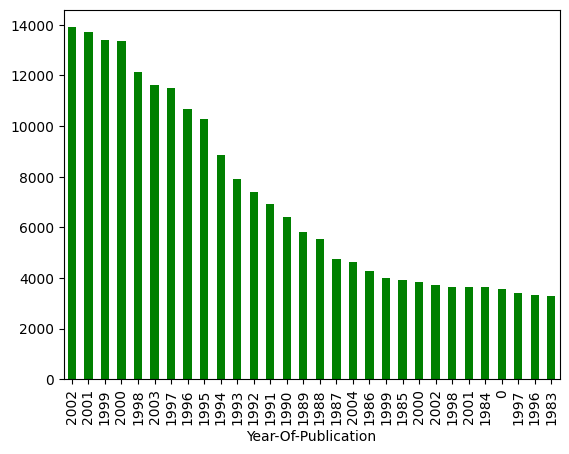

In [43]:
books['Year-Of-Publication'].value_counts().head(30).plot(kind='bar',color='green')

<Axes: ylabel='Book-Author'>

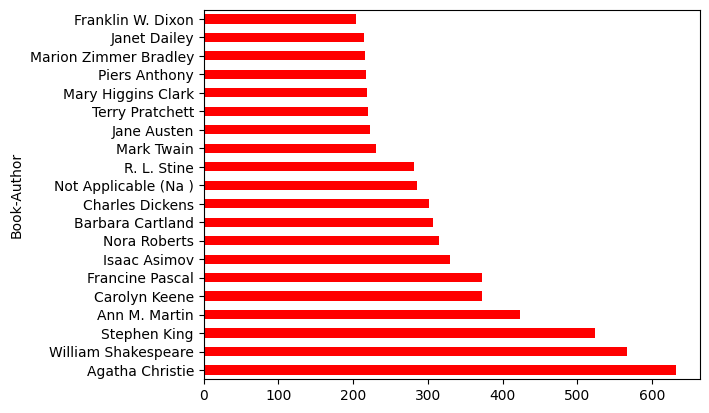

In [44]:
books['Book-Author'].value_counts().head(20).plot(kind='barh',color='red')

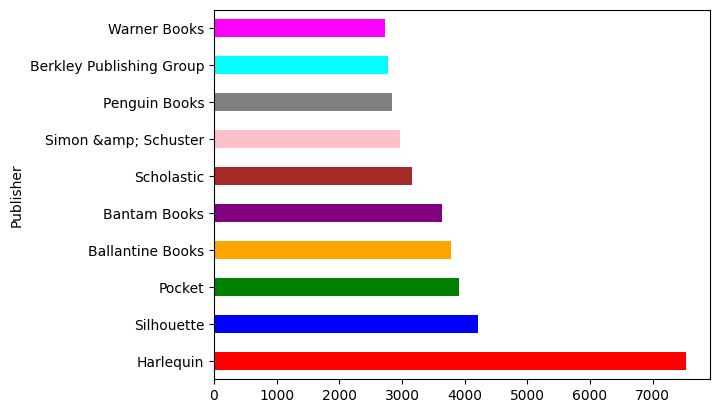

In [45]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

books['Publisher'].value_counts().head(10).plot(
    kind='barh',
    color=colors
)
plt.show()


In [46]:
ratting.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [47]:
ratting['Book-Rating'].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [48]:
new_ratting=ratting.groupby('ISBN')['Book-Rating'].mean().reset_index()
new_ratting

,ISBN,Book-Rating
0,0330299891,3.0
1,0375404120,1.5
2,0586045007,0.0
3,9022906116,3.5
4,9032803328,0.0
...,...,...
340551,cn113107,0.0
340552,ooo7156103,7.0
340553,§423350229,0.0
340554,´3499128624,8.0


In [49]:
new_ratting=new_ratting[new_ratting['ISBN'].isin(books['ISBN'])]


In [50]:
merged_df = pd.merge(books,new_ratting, on='ISBN', how='inner')


In [51]:
merged_df.sort_values('Book-Rating',ascending=False).head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating
270128,3423200944,"Hokuspokus, liebe mich. Und fÃ?Â¼nfzig andere ...",Helen Glisic,1997,Dtv,http://images.amazon.com/images/P/3423200944.0...,http://images.amazon.com/images/P/3423200944.0...,http://images.amazon.com/images/P/3423200944.0...,10.0
146413,0486204227,Essential German Grammar,Guy Stern,1961,Dover Publications,http://images.amazon.com/images/P/0486204227.0...,http://images.amazon.com/images/P/0486204227.0...,http://images.amazon.com/images/P/0486204227.0...,10.0


# Model Building

### Popularity Based Redomendation System

Join Books and review Column

In [64]:
ratting_with_name=pd.merge(books,ratting, on='ISBN')

In [65]:
ratting_with_name.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5


In [54]:
num_ratting=ratting_with_name.groupby('Book-Title')['Book-Rating'].count().reset_index()
num_ratting.rename(columns={'Book-Rating':'num-Rating'},inplace=True)
num_ratting

,Book-Title,num-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [55]:
avg_ratting=ratting_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_ratting.rename(columns={'Book-Rating':'avg-Rating'},inplace=True)
avg_ratting

,Book-Title,avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [56]:
populatity_df=pd.merge(num_ratting,avg_ratting, on='Book-Title')
populatity_df.head()

,Book-Title,num-Rating,avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [57]:
populatity_df=populatity_df[populatity_df['num-Rating'] >= 250].sort_values('avg-Rating',ascending=False).head(50)

In [58]:
populatity_df=pd.merge(populatity_df,books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num-Rating','avg-Rating']]

In [59]:
populatity_df.head()

,Book-Title,Book-Author,Image-URL-M,num-Rating,avg-Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


### colaborative Based Recomendation System

In [90]:
x = ratting_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [91]:
filtered_rating = ratting_with_name[ratting_with_name['User-ID'].isin(padhe_likhe_users)]

In [92]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [94]:
final_ratting=filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [97]:
pt=final_ratting.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [98]:
pt.fillna(0,inplace=True)

In [99]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
from sklearn.metrics.pairwise import cosine_similarity

In [101]:
similarity_scores = cosine_similarity(pt)

In [102]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [147]:

def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [148]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg']]

In [139]:
import pickle
pickle.dump(populatity_df,open('popular.pkl','wb'))

In [149]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))